# A simple example
In this notebook, we show you how to model and solve a simple flexible job shop problem with PyJobShop.

A scheduling problem consists of three main elements:
- **Machines**: a machine is a resource that can process operations.
- **Operations**: an operation is a task that needs to be scheduled, i.e., its starting time, ending time and selected machine must be decided.
- **Jobs**: a job represents a collection of operations and can be used to measure performance metrics such as completion times or tardiness.

The Flexible Job Shop Problem (FJSP) is a commonly studied scheduling problem that generalizes many known scheduling problem variants. 
In the FJSP, there is a set of machines $M$ and a set of jobs $J$.
Each job is composed of a sequence of operations denoted by $O$, which must be performed in sequence.
Each operation needs to be processed by exactly one machine that is selected from a set of eligible machines.
The main goal of the FJSP is commonly to minimize the makespan.

Let's consider a simple example from [Google OR-Tools](https://github.com/google/or-tools/blob/master/examples/python/flexible_job_shop_sat.py). Below we have a data instance with three machines and three jobs, each job consisting of three operations.

In [1]:
# Each job consists of a list of operations. An operation is represented
# by a list of tuples (processing_time, machine), defining the machine
# assignment alternatives and corresponding duration for an operation.
NUM_MACHINES = 3

data = [
    [  # Job 1
        [(3, 0), (1, 1), (5, 2)],  # Operation with three eligible machines
        [(2, 0), (4, 1), (6, 2)],
        [(2, 0), (3, 1), (1, 2)],
    ],
    [
        [(2, 0), (3, 1), (4, 2)],
        [(1, 0), (5, 1), (4, 2)],
        [(2, 0), (1, 1), (4, 2)],
    ],
    [
        [(2, 0), (1, 1), (4, 2)],
        [(2, 0), (3, 1), (4, 2)],
        [(3, 0), (1, 1), (5, 2)],
    ],
]

PyJobShop provides a simple modeling interface through its `Model` class.
Let's import the `Model` class and initialize it.

In [2]:
from pyjobshop import Model

m = Model()

Data objects such as machines, jobs and operations can be created with the `Model.add_*` method.

In [3]:
machines = [
    m.add_machine(name=f"Machine {idx}") for idx in range(NUM_MACHINES)
]

In [4]:
jobs = {}
operations = {}

for job_idx, job_data in enumerate(data):
    jobs[job_idx] = m.add_job(name=f"Job {job_idx}")

    for operation_idx in range(len(job_data)):
        idx = (job_idx, operation_idx)
        operations[idx] = m.add_operation(name=f"Operation {idx}")

There are three more things that we need to add to the model:
- Operations have to be associated with their corresponding job;
- Processing times of specific operation and machine combinations must be set;
- Operations of the same job must be processed in a given order;


Let's add the remaining three steps to the model.

In [5]:
for job_idx, job_data in enumerate(data):
    for operation_idx, operation_data in enumerate(job_data):
        job = jobs[job_idx]
        operation = operations[(job_idx, operation_idx)]
        m.assign_job_operations(job, [operation])

        for duration, machine_idx in operation_data:
            m.add_processing_time(machines[machine_idx], operation, duration)

    for idx in range(len(job_data) - 1):
        first = operations[(job_idx, idx)]
        second = operations[(job_idx, idx + 1)]
        m.add_timing_precedence(first, second)

The current interface for assigning jobs to operations is a bit verbose. We will improve this in a later version :-).

Now that we have our model setup correctly, we can solve the model.

In [6]:
result = m.solve()

 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 42 variables, 60 constraints
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 71.3 (before), 71.3 (after)
 !  . Memory usage      : 542.7 kB (before), 542.7 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         42                 -
 + New bound is 0
 ! Using iterative diving.
 *            22       19  0.02s        1      (gap is 100.0%)
 *            19       55  0.02s        1      (gap is 100.0%)
 *            14       73  0.02s        1      (gap is 100.0%)
 *            13      109  0.02s        1      (gap is 100.0%)
 *            12      127  0.02s        1      (gap is 100.0%)
 *             6      415  0.02s        1      (gap is 100.0%)
               

The output above is from CP Optimizer and shows the solver output. Turns out we have found the optimal solution! Let's plot that solution.

In [7]:
from pyjobshop import plot

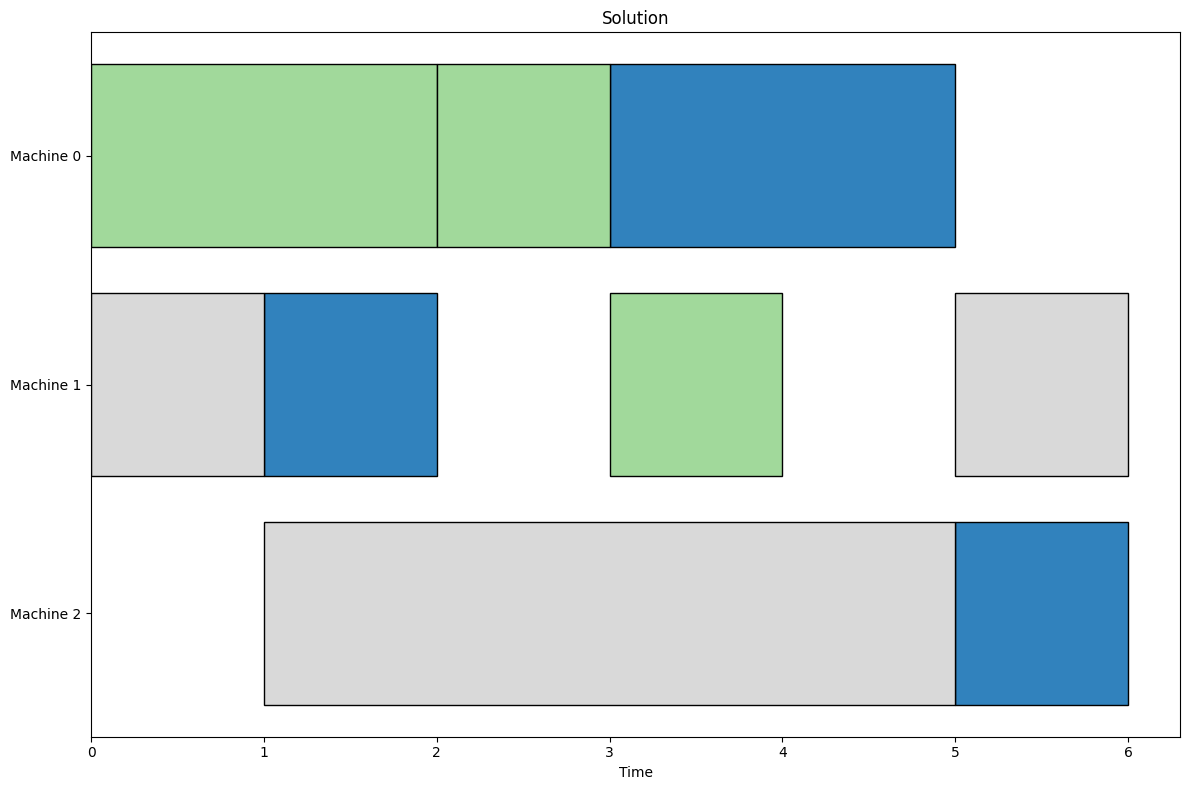

In [8]:
data = m.data()
plot(data, result.solution)

This concludes the notebook. We showed how to setup a simple FJSP problem instance using PyJobShop's modeling interface. After setup, we solved the model and plotted the optimal solution.